# Project1 Part 3: Data Visualizations  
The task is to build several data visualizations that help exemplify relationships in the data

In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

### Import cleaned data

In [2]:
# load dataframe
file = r"D:\CodingDojo\food-sales-predictions-kb\sales_predictions_clean.csv"

df = pd.read_csv(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6109 non-null   object 
 1   Item_Weight                6109 non-null   float64
 2   Item_Fat_Content           6109 non-null   object 
 3   Item_Visibility            6109 non-null   float64
 4   Item_Type                  6109 non-null   object 
 5   Item_MRP                   6109 non-null   float64
 6   Outlet_Identifier          6109 non-null   object 
 7   Outlet_Establishment_Year  6109 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       6109 non-null   object 
 10  Outlet_Type                6109 non-null   object 
 11  Item_Outlet_Sales          6109 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 572.8+ KB


In [4]:
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
5,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
6,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
7,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
8,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
9,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Visualizations

## Correlation  
 * some correlation between `Item Outlet Sales` and `Item MRP`
 * some negative correlation between `Item Outlet Sales` and `Item Visibility`

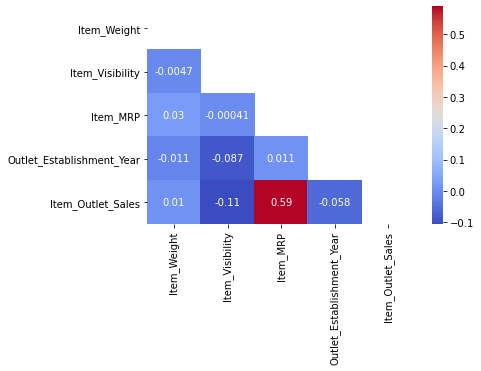

In [6]:
# get pearson's correlation between values
corr = df.corr()

# create mask to hide upper half
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# create heatmap with seaborn
sb.heatmap(corr, cmap='coolwarm', annot=True, mask=mask);


## Item Outlet Sales distribution by Supermarket Type  
 * each market type has a distribution of sales

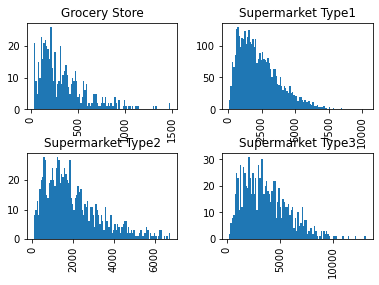

In [7]:
df['Item_Outlet_Sales'].hist(by=df['Outlet_Type'], bins=100);

## Categorical Plots

### Cumulative Item Sales by Market Type  
 * supermarket type 1 has the most sales

##### What is the distribution of item types and sales per market outlet type?

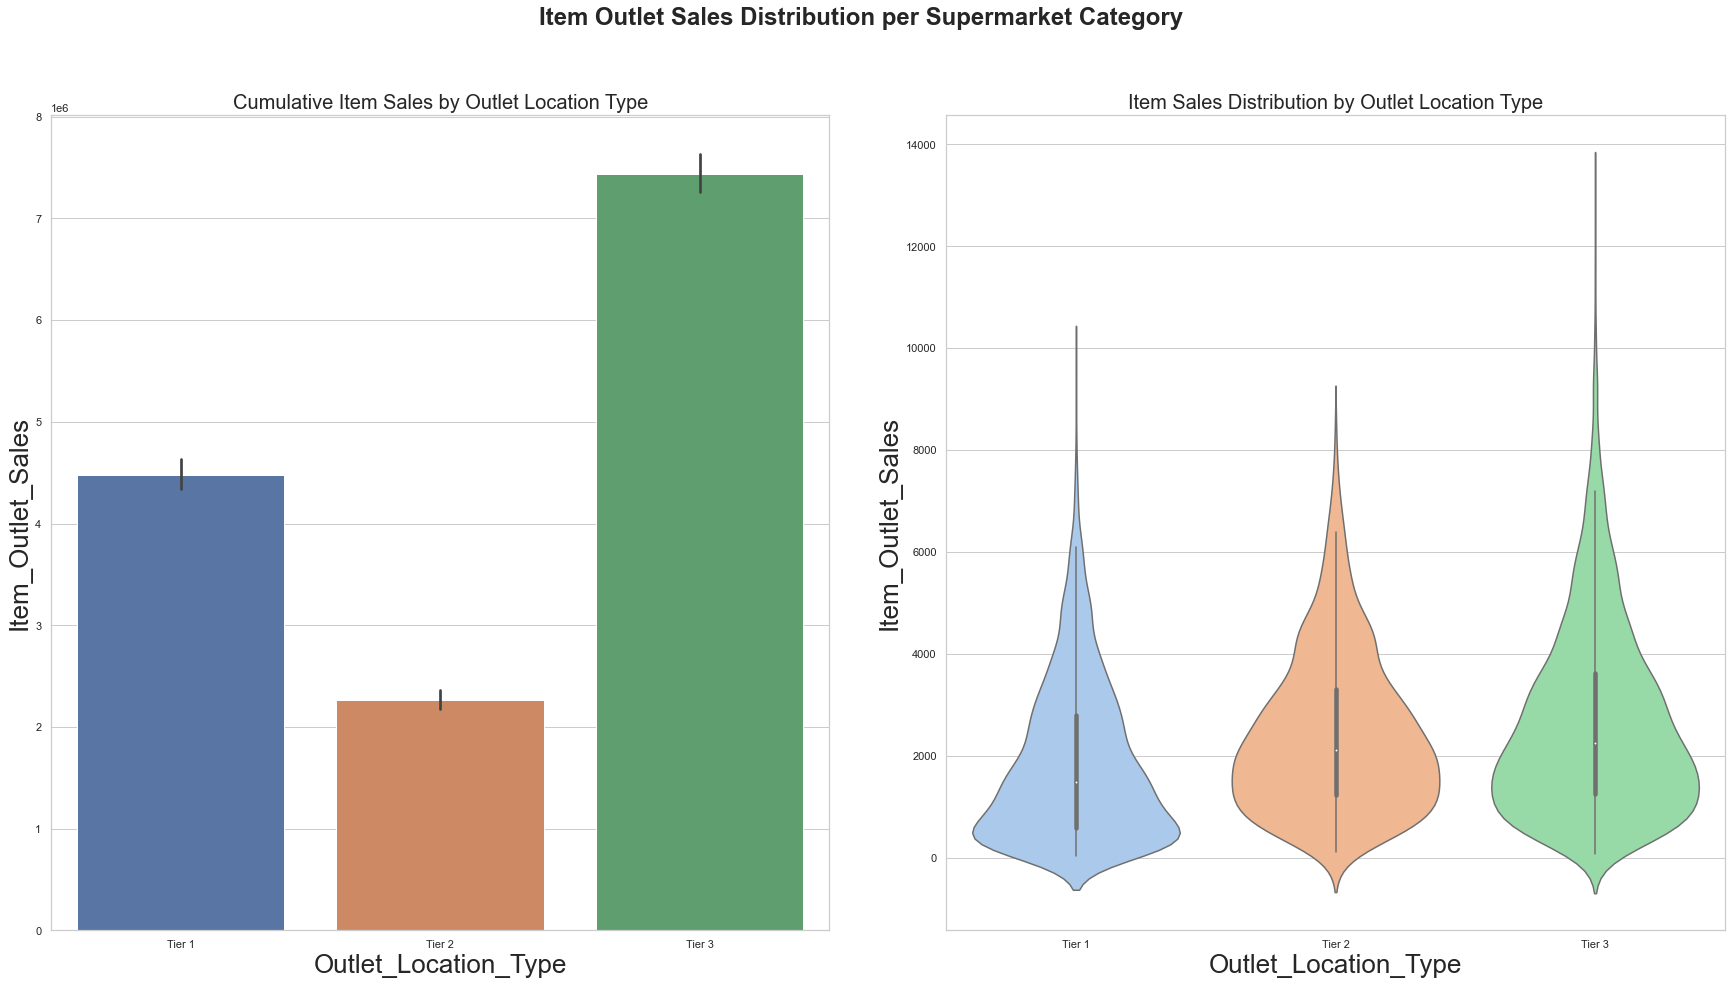

In [38]:
# create figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,15), gridspec_kw={'wspace': .15})

fig.suptitle('Item Outlet Sales Distribution per Supermarket Category', 
             fontsize= 24, 
             fontweight= 'bold')

ax[0].set_title('Cumulative Item Sales by Outlet Location Type', fontsize=20)
ax[1].set_title('Item Sales Distribution by Outlet Location Type', fontsize=20)

# create bar plot
sb.barplot(ax= ax[0],
               x='Outlet_Location_Type', 
               y='Item_Outlet_Sales', 
               hue=None,
               estimator=sum,
               data=df.sort_values(by=['Outlet_Location_Type']))

# create violin plot
sb.violinplot(ax= ax[1],
            x='Outlet_Location_Type',
            y='Item_Outlet_Sales',
            hue=None,
            kind="violin",
            scale='width',
            palette='pastel',
            dodge=True,
            data=df.sort_values(by=['Outlet_Location_Type','Outlet_Type']))


# show plot
plt.show()

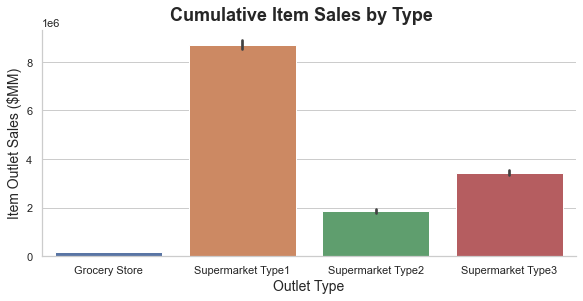

In [35]:
# set the figure size
sb.set_theme(rc = {'figure.figsize': (20,10), 'axes.labelsize': 14})
sb.set_style('whitegrid')

# create plots
g = sb.catplot(x="Outlet_Type", 
               y="Item_Outlet_Sales", 
               hue=None,
               kind="bar",
               estimator=sum,
               col=None,
               col_wrap=None,
               row=None,
               height=4,
               aspect=2,
               data=df.sort_values(by=['Outlet_Location_Type','Outlet_Type']));

# set figure title
g.fig.suptitle('Cumulative Item Sales by Type',
              fontsize= 18,
              fontweight= 'bold')

# adjust overlap between axes titles and figure titles
g.fig.subplots_adjust(top= 0.90)

# set axis labels for axes
g.set_axis_labels('Outlet Type','Item Outlet Sales ($MM)')
                   
# show plot
plt.show()

### Cumulative Sales by Item and Supermarket Type  
Top Sellers are:
 * Fuits and Vegetables
 * Snacks
 
Supermarket Type 1 sells the most items

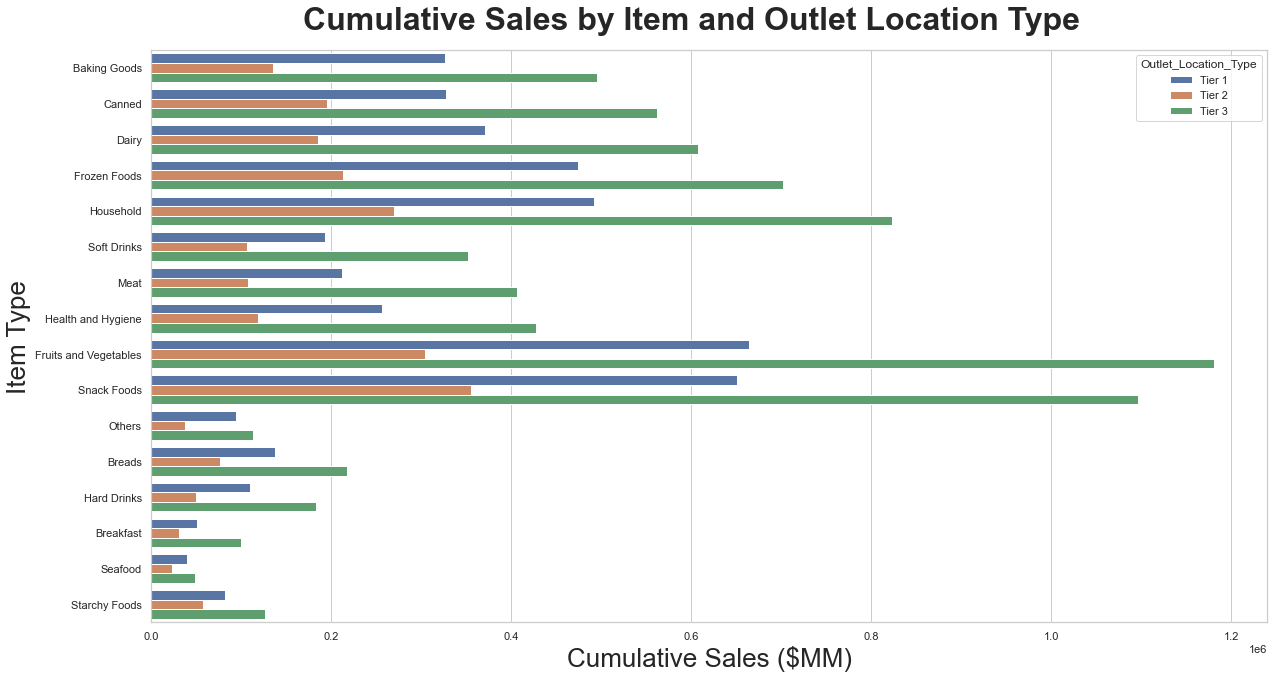

In [37]:
# set the figure size
sb.set(rc = {'figure.figsize': (20,10),
            'axes.labelsize': 26})

# set plot style
sb.set_style('whitegrid')

#create fig, ax
fig, ax = plt.subplots(1,1)



# create bar plot
sb.barplot(ax = ax,
           y='Item_Type', 
           x='Item_Outlet_Sales', 
           hue='Outlet_Location_Type',
           estimator=sum,
           ci=None,
           data=df.sort_values(by=['Outlet_Location_Type','Outlet_Type']));

# set figure title
fig.suptitle('Cumulative Sales by Item and Outlet Location Type',
              fontsize= 32,
              fontweight= 'bold')

# adjust overlap between axes titles and figure titles
fig.subplots_adjust(top= 0.92)

# set axis labels for axes
ax.set(xlabel='Cumulative Sales ($MM)', ylabel='Item Type')

# show plot
plt.show()





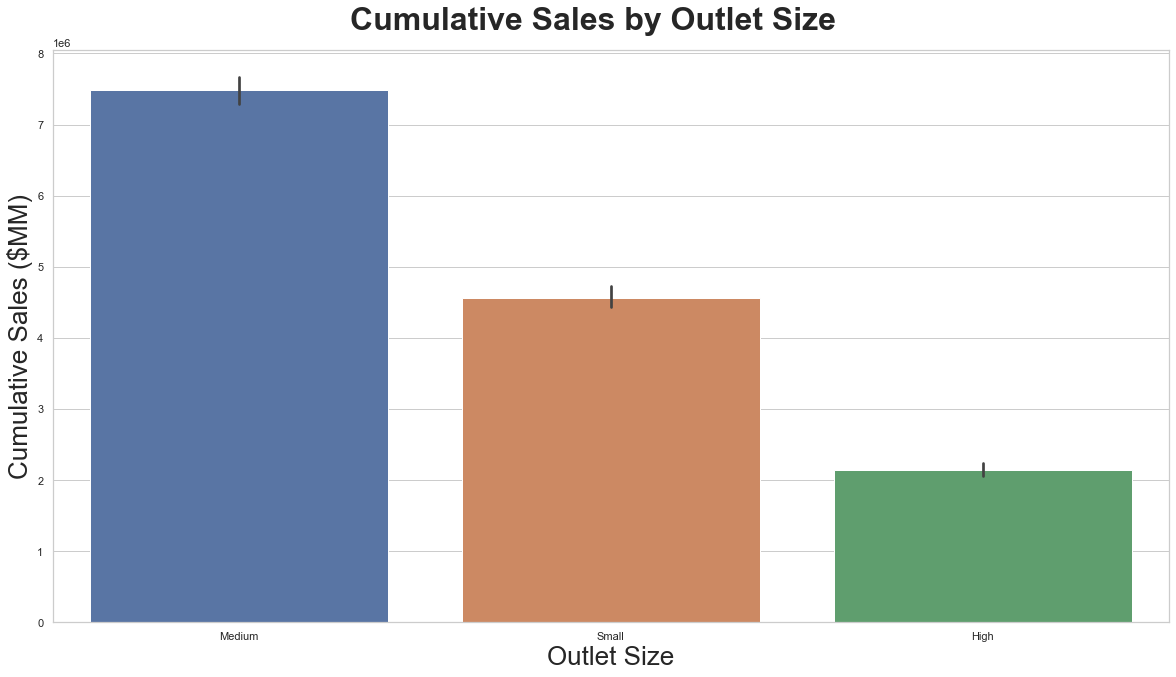

In [33]:
# create bar plot
fig, ax = plt.subplots(1,1)

sb.set_theme(rc = {'figure.figsize': (20,10), 'axes.labelsize': 28})
sb.set_style('whitegrid')

fig.subplots_adjust(top= .92)

sb.barplot(ax = ax,
           x='Outlet_Size', 
               y='Item_Outlet_Sales', 
               hue=None,
               estimator=sum,
               data=df.sort_values(by=['Outlet_Location_Type']))

fig.suptitle('Cumulative Sales by Outlet Size',
              fontsize= 32,
              fontweight= 'bold')

# set axis labels for axes
ax.set(ylabel='Cumulative Sales ($MM)', xlabel='Outlet Size');

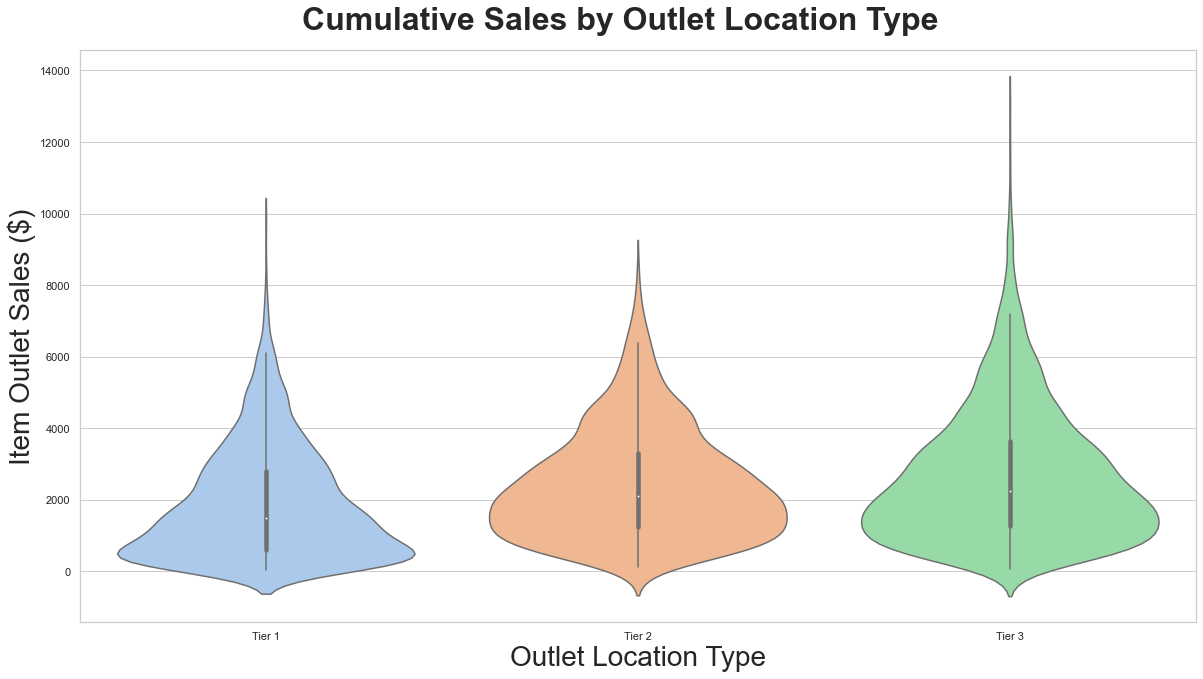

In [42]:
fig, ax = plt.subplots(1,1)

sb.set_theme(rc = {'figure.figsize': (20,10), 'axes.labelsize': 28})
sb.set_style('whitegrid')

fig.subplots_adjust(top= .92)


# create violin plot
sb.violinplot(ax= ax,
            x='Outlet_Location_Type',
            y='Item_Outlet_Sales',
            hue=None,
            kind="violin",
            scale='width',
            palette='pastel',
            dodge=True,
            data=df.sort_values(by=['Outlet_Location_Type','Outlet_Type']));

fig.suptitle('Cumulative Sales by Outlet Location Type',
              fontsize= 32,
              fontweight= 'bold')

# set axis labels for axes
ax.set(ylabel='Item Outlet Sales ($)', xlabel='Outlet Location Type');